In [1]:
import scvelo as scv
import numpy as np
scv.set_figure_params()
adata = scv.datasets.pancreas()

In [2]:
scv.pp.filter_and_normalize(adata)
scv.pp.moments(adata)

Normalized count data: X, spliced, unspliced.
Logarithmized X.
computing neighbors


OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [3]:
print(adata)

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
    var: 'highly_variable_genes', 'gene_count_corr'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu'
    obsp: 'distances', 'connectivities'


In [4]:
scv.tl.velocity(adata, mode='stochastic')

computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [5]:
np.shape(adata.layers["velocity"])

(3696, 27998)

In [6]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/36 cores)


  0%|          | 0/3696 [00:00<?, ?cells/s]

    finished (0:00:21) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [7]:
"""
scv.pl.velocity_embedding(adata, basis='pca')
scv.pl.velocity_embedding_grid(adata, basis='pca')
scv.pl.velocity_embedding_stream(adata, basis='pca')
"""

"\nscv.pl.velocity_embedding(adata, basis='pca')\nscv.pl.velocity_embedding_grid(adata, basis='pca')\nscv.pl.velocity_embedding_stream(adata, basis='pca')\n"

In [8]:
import scipy

In [9]:
VGd = scipy.sparse.csr_matrix.todense(adata.uns["velocity_graph"])

In [10]:
np.shape(VGd)

(3696, 3696)

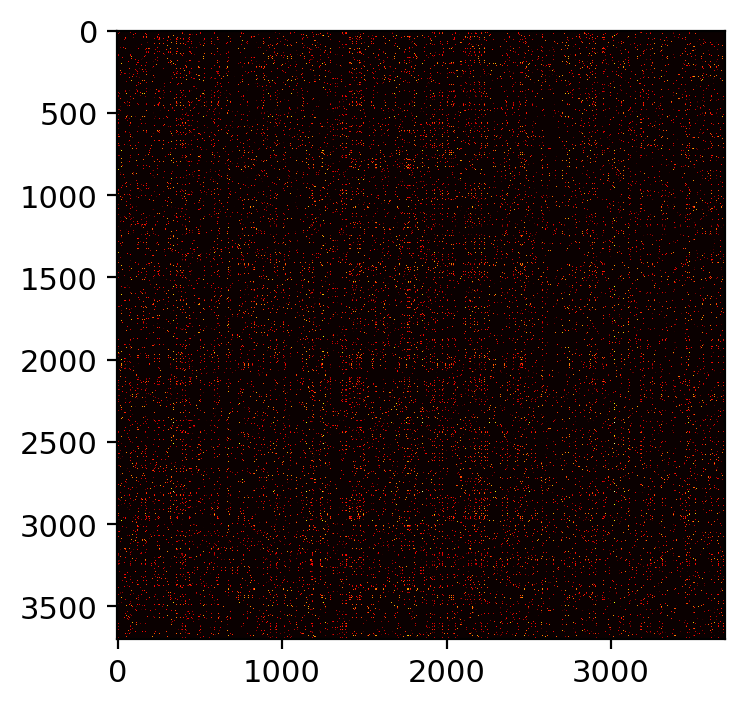

In [11]:
import matplotlib.pyplot as plt

plt.imshow(VGd, cmap='hot', interpolation='nearest')
plt.show()

In [12]:
np.shape(adata.layers["velocity"])

(3696, 27998)